## Import Statements

In [38]:
import pandas as pd
import numpy as np
import copy

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

import random

r = 1337
np.random.seed(r)
random.seed(r)

## Read in Data

In [2]:
train_test = pd.read_json('data/train-test.json')
labels = train_test[['label']]
train_test = train_test.drop('label', axis='columns')

### Split Data

In [3]:
# We can only look at the statistics of the training set

train_size=0.75

X_train, X_test, y_train, y_test = train_test_split(
    train_test.values,
    labels.values.ravel(),
    train_size=train_size,
    shuffle=True,
    random_state=r,
    stratify=labels.values.ravel()
)

imp = IterativeImputer(max_iter=100, random_state=r)

X_train = imp.fit_transform(X_train)

train_set = pd.DataFrame(X_train, columns=train_test.columns)
train_labels = pd.DataFrame(y_train, columns=['labels'])
train_set.insert(loc=0, column='labels', value=train_labels)

In [4]:
train_set.head()

,labels,turbidity,air_temp,rel_hum,wind_speed,chlor,phycocyanin,do_raw,do_sat,do_wtemp,...,sin_wind_dir,DAILYPrecip_one_day,DAILYPrecip_three_day,DAILYPrecip_one_week,COUNTPrecip_one_day,COUNTPrecip_three_day,COUNTPrecip_one_week,algalBloomSheen_one_day,algalBloomSheen_three_day,algalBloomSheen_one_week
0,0,76.500000,18.194639,85.623812,6.647729,1333.814634,727.461111,8.407875,100.761181,24.462236,...,-0.542350,1.52,1.86,1.86,1.0,2.0,2.0,0.0,0.0,0.0
1,0,44.000000,21.869322,73.530964,6.514962,1976.117400,716.087980,7.744528,84.316171,19.481965,...,-0.980666,0.00,0.00,0.01,0.0,0.0,1.0,0.0,0.0,0.0
2,1,57.180000,22.036615,72.450965,3.860514,5079.430556,1037.593333,12.263011,143.003298,22.899222,...,0.107657,0.00,0.03,1.60,0.0,1.0,5.0,1.0,3.0,6.0
3,0,117.142857,25.435972,79.110257,4.278528,1131.573611,690.301667,8.287181,100.242500,23.260826,...,-0.553846,0.47,2.11,3.19,1.0,3.0,5.0,1.0,1.0,1.0
4,0,88.485980,12.654402,65.336770,3.610094,6524.554788,597.915157,13.355924,119.668294,9.075564,...,0.007835,0.00,0.89,1.68,0.0,2.0,6.0,0.0,0.0,0.0


## Observe Correlation Between Labels and Features

In [5]:
train_set

,labels,turbidity,air_temp,rel_hum,wind_speed,chlor,phycocyanin,do_raw,do_sat,do_wtemp,...,sin_wind_dir,DAILYPrecip_one_day,DAILYPrecip_three_day,DAILYPrecip_one_week,COUNTPrecip_one_day,COUNTPrecip_three_day,COUNTPrecip_one_week,algalBloomSheen_one_day,algalBloomSheen_three_day,algalBloomSheen_one_week
0,0,76.500000,18.194639,85.623812,6.647729,1333.814634,727.461111,8.407875,100.761181,24.462236,...,-0.542350,1.52,1.86,1.86,1.0,2.0,2.0,0.0,0.0,0.0
1,0,44.000000,21.869322,73.530964,6.514962,1976.117400,716.087980,7.744528,84.316171,19.481965,...,-0.980666,0.00,0.00,0.01,0.0,0.0,1.0,0.0,0.0,0.0
2,1,57.180000,22.036615,72.450965,3.860514,5079.430556,1037.593333,12.263011,143.003298,22.899222,...,0.107657,0.00,0.03,1.60,0.0,1.0,5.0,1.0,3.0,6.0
3,0,117.142857,25.435972,79.110257,4.278528,1131.573611,690.301667,8.287181,100.242500,23.260826,...,-0.553846,0.47,2.11,3.19,1.0,3.0,5.0,1.0,1.0,1.0
4,0,88.485980,12.654402,65.336770,3.610094,6524.554788,597.915157,13.355924,119.668294,9.075564,...,0.007835,0.00,0.89,1.68,0.0,2.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,75.900000,15.300625,94.190174,1.037125,8800.943056,895.902153,13.896896,134.685625,12.466944,...,0.911014,0.13,1.61,3.16,1.0,3.0,5.0,0.0,0.0,1.0
377,0,87.636364,17.130439,78.808123,4.678640,1718.020175,654.646316,10.621789,121.583386,22.025702,...,-0.530815,0.34,0.34,0.51,1.0,1.0,3.0,0.0,0.0,1.0
378,1,71.000000,22.180502,71.071270,3.130223,3862.609028,1595.463472,14.686215,168.908440,22.150259,...,0.105984,0.03,0.28,1.61,1.0,3.0,6.0,1.0,2.0,5.0
379,0,94.000000,23.405833,77.699944,4.992840,1824.870833,431.812778,10.547937,116.769653,20.325451,...,0.998011,0.27,0.27,0.46,1.0,1.0,4.0,1.0,2.0,3.0


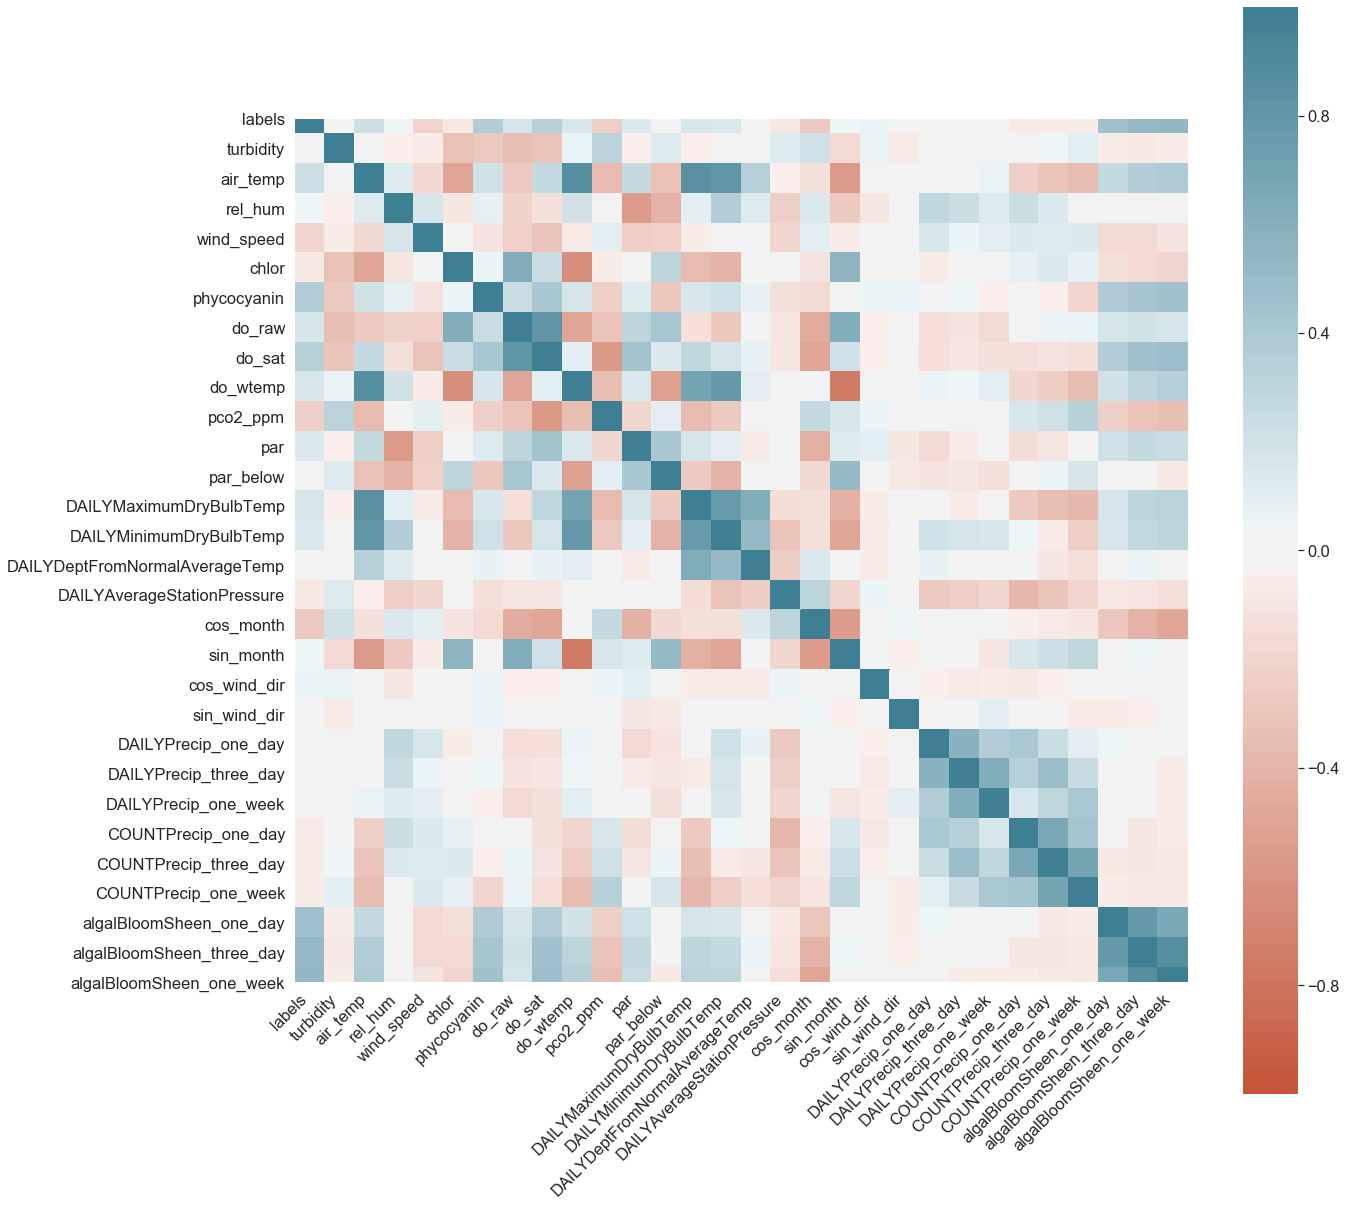

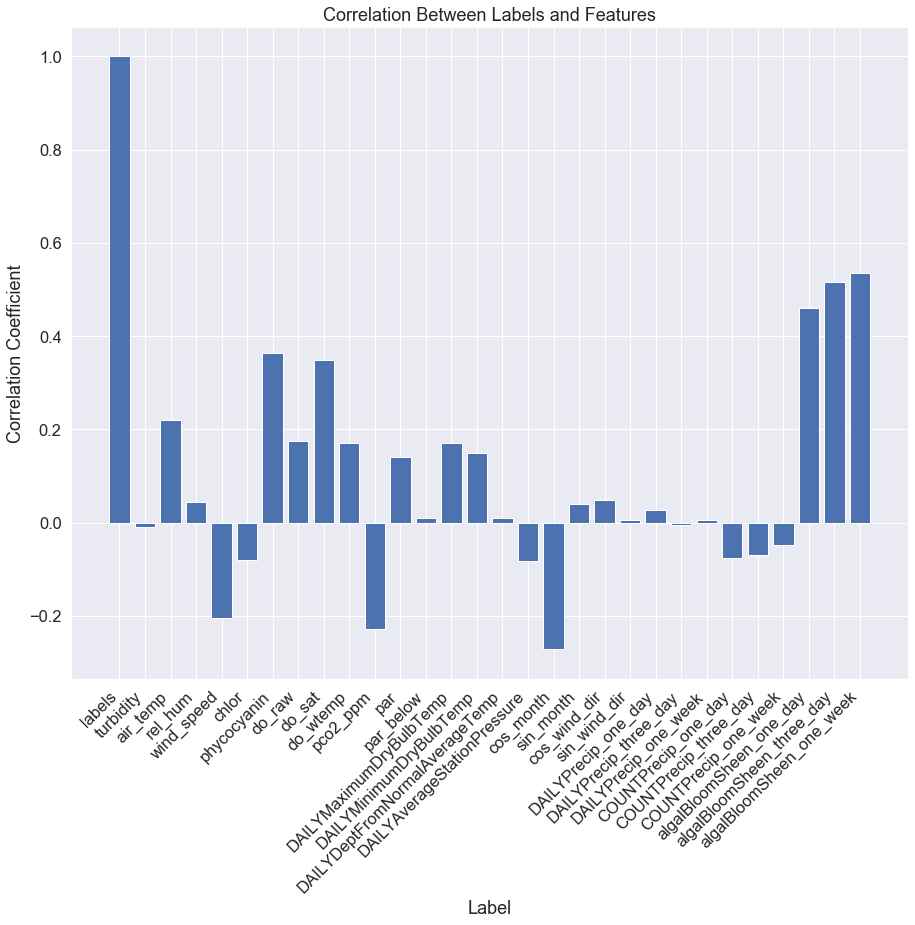

In [40]:
corr = train_set.corr()
plt.subplots(figsize=(20, 20))
sns.set(font_scale=1.5)

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.figure(figsize=(15, 12))
plt.bar(corr['labels'].index, corr['labels'])
plt.xlabel('Label')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Between Labels and Features');

### Features to consider for augmentation

- wind_speed: As shown in [1][2][3], the density of algal blooms is "significantly negatively correlated with discharge or flow rate."[1] wind speed increases flow rate. [2][3] provide support that wind has a negative correlation with wind speed. [Yes]
- cos_month: Based on chart above. I think cos_month is significant likely is due to the seasonal effect from the summer (mostly temperature). [Yes]
- air_temp: It's well known that air temp is an important variable in causing algal blooms. [4] is one resource discussing this. [Yes]
- turbidity: This is also known to be a cause of algal blooms, but cannot be included for data augmentation because the dataset shows a correlation of almost 0 with the labels. This is likely due to poor measurement. [No]
- Rainfall: Generally is a predictor, but since we are interested in making a next-day prediction, it might not be useful. [No]
- phycocyanin: This is a pigment in the aglae. It is correlated, so it is worth trying to augment, but it is likely linked with the presence of an algal bloom on any given day, rather than being useful for prediction of the next day. This feature could just be a noisier version of algalBloomSheen_one_day. [Yes]
- do_raw, do_sat: The amount of dissolved oxygen is a good predictor of algal blooms, and should be included. [Yes]
- do_wtemp: water temperature is useful in determing algal blooms, so it should be included as well. [Yes]
- pco2_ppm: Partial pressure of carbon dioxide, which life depends on. From above, we see that this is negatively correlated with the label, so may be worth agumenting. [5] elaborates on the effect of pco2 on Daphnia, another catalyst of algal blooms [Yes]
- algalBloomSheen_one/three_day/week: Omitted since there is no notion of augmentating this features [No]

### Papers

- [1] Algal blooms in the middle and lower Han River: Characteristics, early warning and prevention
- [2] https://www.newstimes.com/local/article/Paper-suggests-wind-speeds-cause-of-blue-green-13213538.php
- [3] https://www.sciencedaily.com/releases/2014/12/141217090559.htm
- [4] https://cees.iupui.edu/research/algal-toxicology/bloomfactors
- [5] Rising pCO2 in Freshwater Ecosystems Has the Potential to Negatively Affect Predator-Induced Defenses in Daphnia

## Get Statistics for Each Class (Old)

In [34]:
pos = train_set.loc[train_set['labels'] == 1]    # dataframe of postive examples
neg = train_set.loc[train_set['labels'] == 0]    # dataframe of negative examples

train_set.drop('labels', axis='columns', inplace=True)

In [35]:
stats = ['min', 'max', 'mean', 'median', 'std']   # statistics of interest for each class

pos_stat = np.zeros((len(stats), len(train_set.columns)))
neg_stat = np.zeros((len(stats), len(train_set.columns)))

for c in ['pos', 'neg']:
    if c == 'pos':
        df = pos
        stat = pos_stat
    else:
        df = neg
        stat = neg_stat
    for col in range(len(train_set.columns)):
        stat[:, col] = [
            np.min(df.iloc[:, col]),
            np.max(df.iloc[:, col]),
            np.mean(df.iloc[:, col]),
            np.median(df.iloc[:, col]),
            np.std(df.iloc[:, col]),
        ]
        
pos_stat_df = pd.DataFrame(pos_stat, index=stats, columns=train_set.columns)
neg_stat_df = pd.DataFrame(neg_stat, index=stats, columns=train_set.columns)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print('Positive Class Statistics')
    display(pos_stat_df)
    print('\n\nNegative Class Statistics')
    display(neg_stat_df)
    print('\n\nDifference of Positive and Negative Class Statistics')
    display((pos_stat_df-neg_stat_df).abs())

Positive Class Statistics


,turbidity,air_temp,rel_hum,wind_speed,chlor,phycocyanin,do_raw,do_sat,do_wtemp,pco2_ppm,par,par_below,DAILYMaximumDryBulbTemp,DAILYMinimumDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageStationPressure,cos_month,sin_month,cos_wind_dir,sin_wind_dir,DAILYPrecip_one_day,DAILYPrecip_three_day,DAILYPrecip_one_week,COUNTPrecip_one_day,COUNTPrecip_three_day,COUNTPrecip_one_week,algalBloomSheen_one_day,algalBloomSheen_three_day,algalBloomSheen_one_week
min,1.0,33.000000,8.471084,46.308348,1.019493,637.108264,380.548056,6.666889,78.837326,6.360753,55.563238,84.368958,-58.112548,51.000000,32.000000,-12.500000,28.460000,-1.000000e+00,-1.000000e+00,-0.999929,-0.999621,0.000000,-8.465451e-16,-9.350160e-16,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,120.000000,27.162569,94.190174,7.452410,12023.658333,2884.347601,19.885097,196.142500,27.455063,492.842639,1066.721304,453.326667,95.000000,75.000000,20.100000,29.340000,-1.836970e-16,8.660254e-01,0.999487,0.999992,3.780000,3.920000e+00,6.800000e+00,1.000000,3.000000,7.000000,1.000000,3.000000
mean,1.0,90.178346,21.049978,72.702368,3.263397,2421.319896,905.942628,10.819052,124.401148,21.735282,191.821763,490.155268,105.852140,78.284163,57.346154,1.780502,29.047923,-7.597336e-01,-2.624950e-01,0.036285,0.034344,0.170000,4.683077e-01,1.142769e+00,0.430769,1.330769,3.200000,0.615385,1.776923
median,1.0,92.251627,21.777986,72.220264,3.173291,1442.252247,789.615451,10.781050,124.864028,22.450467,170.675935,493.982014,90.983359,79.000000,59.000000,0.750000,29.050000,-8.660254e-01,1.224647e-16,0.022242,0.053220,0.000000,1.750000e-01,7.700000e-01,0.000000,1.000000,3.000000,1.000000,2.000000
std,0.0,20.112602,3.677636,9.589446,1.303770,2306.040867,408.912489,2.011140,21.428531,3.952808,101.037077,161.326720,83.575997,8.392535,8.772081,6.628948,0.130924,3.218292e-01,5.003270e-01,0.627714,0.677714,0.457539,6.964185e-01,1.207039e+00,0.495184,1.018207,1.642699,0.486504,1.076071




Negative Class Statistics


,turbidity,air_temp,rel_hum,wind_speed,chlor,phycocyanin,do_raw,do_sat,do_wtemp,pco2_ppm,par,par_below,DAILYMaximumDryBulbTemp,DAILYMinimumDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageStationPressure,cos_month,sin_month,cos_wind_dir,sin_wind_dir,DAILYPrecip_one_day,DAILYPrecip_three_day,DAILYPrecip_one_week,COUNTPrecip_one_day,COUNTPrecip_three_day,COUNTPrecip_one_week,algalBloomSheen_one_day,algalBloomSheen_three_day,algalBloomSheen_one_week
min,0.0,35.000000,5.294792,36.113974,1.038654,524.991208,349.353958,0.000000,0.000000,5.338458,49.554194,4.625418,-5.569237,44.000000,26.000000,-15.700000,28.620000,-1.000000,-1.000000,-0.999993,-0.999851,0.000000,-8.881784e-16,-2.220446e-16,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,120.584917,27.478125,95.884583,7.908236,16211.541667,1264.133333,16.401681,173.155278,27.535035,1249.098025,925.902139,404.170053,92.000000,72.000000,22.700000,29.470000,0.500000,0.866025,0.999977,1.000000,2.740000,3.220000e+00,4.790000e+00,1.000000,3.000000,7.000000,1.000000,3.000000
mean,0.0,90.605846,18.794235,71.778401,3.882032,2854.615292,679.935923,10.027511,108.942047,19.792162,261.837152,443.738111,104.244823,74.756972,54.223108,1.626295,29.072510,-0.540821,-0.315941,-0.031738,0.027074,0.147211,4.745817e-01,1.130279e+00,0.509960,1.482072,3.362550,0.163347,0.573705
median,0.0,89.331716,20.189792,71.225833,3.686833,1811.426389,672.315050,9.827264,108.793681,22.440325,244.324931,445.494028,88.860625,77.000000,55.000000,1.300000,29.070000,-0.500000,-0.500000,-0.021344,0.034169,0.010000,1.000000e-01,1.040000e+00,1.000000,1.000000,3.000000,0.000000,0.000000
std,0.0,20.387647,5.235588,9.925587,1.447922,2691.190468,165.831144,2.148292,18.830975,5.936913,158.332953,152.715013,82.489179,10.241346,10.358803,6.651300,0.147644,0.389532,0.675247,0.659912,0.692559,0.361574,7.048535e-01,1.031444e+00,0.499901,1.019080,1.604287,0.369682,0.868636




Difference of Positive and Negative Class Statistics


,turbidity,air_temp,rel_hum,wind_speed,chlor,phycocyanin,do_raw,do_sat,do_wtemp,pco2_ppm,par,par_below,DAILYMaximumDryBulbTemp,DAILYMinimumDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageStationPressure,cos_month,sin_month,cos_wind_dir,sin_wind_dir,DAILYPrecip_one_day,DAILYPrecip_three_day,DAILYPrecip_one_week,COUNTPrecip_one_day,COUNTPrecip_three_day,COUNTPrecip_one_week,algalBloomSheen_one_day,algalBloomSheen_three_day,algalBloomSheen_one_week
min,1.0,2.000000,3.176293,10.194373,0.019161,112.117056,31.194097,6.666889,78.837326,1.022295,6.009045,79.743540,52.543311,7.000000,6.000000,3.200000,0.160000,0.000000,0.000000,0.000064,0.000230,0.000000,4.163336e-17,7.129713e-16,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,0.584917,0.315556,1.694410,0.455826,4187.883333,1620.214268,3.483417,22.987222,0.079972,756.255386,140.819165,49.156613,3.000000,3.000000,2.600000,0.130000,0.500000,0.000000,0.000490,0.000007,1.040000,7.000000e-01,2.010000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
mean,1.0,0.427500,2.255743,0.923968,0.618635,433.295397,226.006705,0.791542,15.459100,1.943120,70.015389,46.417156,1.607317,3.527191,3.123046,0.154207,0.024587,0.218912,0.053446,0.068023,0.007270,0.022789,6.273981e-03,1.249035e-02,0.079191,0.151302,0.162550,0.452038,1.203218
median,1.0,2.919910,1.588194,0.994431,0.513543,369.174141,117.300401,0.953786,16.070347,0.010142,73.648995,48.487986,2.122734,2.000000,4.000000,0.550000,0.020000,0.366025,0.500000,0.043586,0.019052,0.010000,7.500000e-02,2.700000e-01,1.000000,0.000000,0.000000,1.000000,2.000000
std,0.0,0.275045,1.557951,0.336142,0.144152,385.149601,243.081344,0.137152,2.597556,1.984105,57.295876,8.611707,1.086817,1.848811,1.586722,0.022351,0.016721,0.067703,0.174920,0.032198,0.014845,0.095965,8.435034e-03,1.755946e-01,0.004717,0.000873,0.038412,0.116823,0.207436


## Create Vectors for Data Augmentation

In [36]:
# Note: may need to augmentation based on the correlation among variables, not just looking at mins and maxes
# independently

pos_min = [
    'turbidity',   # maybe remove par_below, add wind_speed
    'par_below',
    'DAILYAverageStationPressure'
]

pos_max = [
    'phycocyanin',
    'do_raw',
    'do_sat',
    'par',
    'par_below',
    'DAILYMaximumDryBulbTemp',
    'DAILYMinimumDryBulbTemp',
    'DAILYPrecip_three_day',
    'DAILYPrecip_one_week'
]

neg_min = [     # maybe remove pco2_ppm, par (very high std)
    'air_temp',
    'rel_hum',
    'chlor',
    'phycocyanin',
    'do_wtemp',
    'pco2_ppm',
    'par',
    'DAILYMaximumDryBulbTemp',
    'DAILYMinimumDryBulbTemp',
    'DAILYDeptFromNormalAverageTemp',
    
]

neg_max = [
    'rel_hum',
    'wind_speed',
    'chlor',
    'pco2_ppm',
    'DAILYDeptFromNormalAverageTemp',
    'DAILYAverageStationPressure'
]

# pos_min_arr = (pd.DataFrame(np.zeros((1, len(train_set.columns))), columns=train_set.columns) + \
#                 pos_stat_df.loc['min', pos_min]).fillna(0).values[0]

# pos_max_arr = (pd.DataFrame(np.zeros((1, len(train_set.columns))), columns=train_set.columns) + \
#                 pos_stat_df.loc['max', pos_max]).fillna(0).values[0]

# neg_min_arr = (pd.DataFrame(np.zeros((1, len(train_set.columns))), columns=train_set.columns) + \
#                 neg_stat_df.loc['min', neg_min]).fillna(0).values[0]

# neg_max_arr = (pd.DataFrame(np.zeros((1, len(train_set.columns))), columns=train_set.columns) + \
#                 neg_stat_df.loc['max', neg_max]).fillna(0).values[0]

In [37]:
num_aug = 5   # number of augmented data points to add for each data point

train_labels_aug = copy.deepcopy(train_labels)   # labels of augmented data set
train_set_aug = copy.deepcopy(train_set)         # augmented training data set

for idx in train_set.index:
    if train_labels.iloc[idx][0] == 1:
        for i in range(num_aug):
            aug = copy.deepcopy(train_set.iloc[idx])
            
            # must randomly choose elements in the intersection of neg_max and neg_min
            inner = list(set(pos_min) & set(pos_max))
            temp_max = copy.deepcopy(pos_max)
            temp_min = copy.deepcopy(pos_min)

            for col in inner:
                if np.random.uniform() >= 0.5:
                    temp_max.remove(col)
                else:
                    temp_min.remove(col)

            mini = pos_stat_df.loc['min'][temp_min] - np.abs(np.random.normal(
                loc=pos_stat_df.loc['min'][temp_min].values,
                scale=pos_stat_df.loc['std'][temp_min].values))

            maxi = pos_stat_df.loc['max'][temp_max] + np.abs(np.random.normal(
                loc=pos_stat_df.loc['max'][temp_max].values,
                scale=pos_stat_df.loc['std'][temp_max].values))

            aug[temp_min] = mini
            aug[temp_max] = maxi
                        
            train_set_aug = train_set_aug.append(aug)
            train_labels_aug = train_labels_aug.append(train_labels.iloc[idx])

    else:
        for i in range(num_aug):
            aug = copy.deepcopy(train_set.iloc[idx])

            # must randomly choose elements in the intersection of neg_max and neg_min
            inner = list(set(neg_min) & set(neg_max))
            temp_max = copy.deepcopy(neg_max)
            temp_min = copy.deepcopy(neg_min)

            for col in inner:
                if np.random.uniform() >= 0.5:
                    temp_max.remove(col)
                else:
                    temp_min.remove(col)

            mini = neg_stat_df.loc['min'][temp_min] - np.abs(np.random.normal(
                loc=neg_stat_df.loc['min'][temp_min].values,
                scale=neg_stat_df.loc['std'][temp_min].values))

            maxi = neg_stat_df.loc['max'][temp_max] + np.abs(np.random.normal(
                loc=neg_stat_df.loc['max'][temp_max].values,
                scale=neg_stat_df.loc['std'][temp_max].values))

            aug[temp_min] = mini
            aug[temp_max] = maxi
            
            train_set_aug = train_set_aug.append(aug)
            train_labels_aug = train_labels_aug.append(train_labels.iloc[idx])

In [38]:
# shuffle data

rand_perm = list(np.random.permutation(len(train_set_aug)))

X_train = train_set_aug.iloc[rand_perm]
y_train = train_labels_aug.iloc[rand_perm]

In [39]:
X_train

,turbidity,air_temp,rel_hum,wind_speed,chlor,phycocyanin,do_raw,do_sat,do_wtemp,pco2_ppm,...,sin_wind_dir,DAILYPrecip_one_day,DAILYPrecip_three_day,DAILYPrecip_one_week,COUNTPrecip_one_day,COUNTPrecip_three_day,COUNTPrecip_one_week,algalBloomSheen_one_day,algalBloomSheen_three_day,algalBloomSheen_one_week
314,0.000000,22.597778,82.995215,2.842972,1365.174306,19842.466975,6475.442802,40.544731,22.424292,227.688056,...,0.999992,0.00,7.818110,6.703014,0.0,0.0,0.0,1.0,3.0,7.0
296,48.000000,12.806151,-2.007493,192.720142,0.941078,-1357.448000,13.468507,128.007708,-24.272411,61.939734,...,0.061262,0.01,1.580000,1.740000,1.0,2.0,5.0,1.0,1.0,1.0
303,110.333333,13.834028,86.331521,2.649812,925.866667,367.854444,13.085119,126.008098,13.587160,532.027500,...,-0.241957,0.08,0.650000,1.120000,1.0,3.0,6.0,0.0,0.0,0.0
228,65.800000,14.656326,50.754708,195.404245,17.198282,-282.938109,8.145146,92.983611,-25.517381,-2.277406,...,0.542228,0.04,0.040000,1.930000,1.0,1.0,5.0,0.0,0.0,0.0
3,117.142857,-9.302319,-2.448176,194.863445,18.483881,-5787.291538,8.287181,100.242500,-15.873671,-4.984148,...,-0.553846,0.47,2.110000,3.190000,1.0,3.0,5.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.000000,24.109722,63.738604,3.036014,2503.782639,22483.865351,5698.066454,38.155617,25.580736,110.198611,...,0.642955,0.00,7.399968,7.916507,0.0,0.0,1.0,0.0,0.0,2.0
10,64.771429,22.331458,84.736965,6.220903,1671.243750,679.527639,8.953229,104.051507,22.831618,164.084583,...,-0.831126,1.68,1.690000,2.740000,1.0,2.0,4.0,1.0,1.0,1.0
183,96.285062,7.837009,56.317248,189.860745,0.251408,-2225.357794,8.361104,94.070694,-17.903074,3.548675,...,-0.790200,0.00,0.010000,0.320000,0.0,1.0,2.0,0.0,0.0,0.0
66,120.000000,16.824365,65.973902,201.503106,-1.520190,-2957.605291,8.935077,100.600000,-5.241130,-0.901091,...,0.860843,0.00,0.010000,0.010000,0.0,1.0,1.0,0.0,0.0,2.0
